## Libs used

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the database

In [2]:
seed = 77

np.random.seed(seed)

In [3]:
data_train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
data_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

## Looking the data base

In [4]:
data_train = data_train.drop('Id', axis = 1)
data_train = data_train.drop(data_train[(data_train['GrLivArea']>4000) & (data_train['SalePrice']<300000)].index)
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data_test_id =data_test['Id']
data_test = data_test.drop('Id', axis = 1) 
data_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Transform data base (NaN and Null)

In [6]:
# Trabalhando com os dados nulos.
# Quero que apareça somente as variaveis que tem valores nulos.

pd.DataFrame(data_train.isnull().sum()).rename(columns={0: 'NaN'}).query('NaN > 0').T

# Apenas as variáveis com valores nulos:

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
NaN,259,1367,8,8,37,37,38,37,38,1,690,81,81,81,81,81,1452,1177,1404


In [7]:
# Modificando os valores nulos de teste e de treino...

data_train = data_train.fillna(value='None')

data_test = data_test.fillna(value='None')


# Checando valores nulos

print(data_train.isnull().sum())
print(' ')
print(' ')
print(data_test.isnull().sum())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64
 
 
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64


## Transforming and Enconde

### Modifying Data Train

In [8]:
data_train_NaN = data_train.drop(list(data_train.select_dtypes(include=('int64', 'float64')).columns), axis =1)
data_train_NaN = data_train_NaN.drop(['LotFrontage','MasVnrArea','GarageYrBlt'], axis = 1)  # Essas variáveis eram do tipo numérica porém tinham "None" no meio... Tem que fazer o tratamento separado dessas variáveis.

NaN = list(data_train_NaN.select_dtypes(include='object').columns)

for i in NaN:
    print(i, ":", data_train[i].unique())

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : ['Pave' 'Grvl']
Alley : ['None' 'Grvl' 'Pave']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : ['AllPub' 'NoSeWa']
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosA' 'PosN' 'RRAn' 'RRAe']
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll']
Exterior1s

In [9]:
encoder = LabelEncoder()

for i in NaN:
    data_train[i] = encoder.fit_transform(data_train_NaN[i])

print(data_train.dtypes)
print(' ')
data_train.head()

MSSubClass        int64
MSZoning          int64
LotFrontage      object
LotArea           int64
Street            int64
                  ...  
MoSold            int64
YrSold            int64
SaleType          int64
SaleCondition     int64
SalePrice         int64
Length: 80, dtype: object
 


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,1,3,3,0,4,...,0,3,4,1,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,1,3,3,0,2,...,0,3,4,1,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,1,0,3,0,4,...,0,3,4,1,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,1,0,3,0,0,...,0,3,4,1,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,1,0,3,0,2,...,0,3,4,1,0,12,2008,8,4,250000


In [10]:
data_train[['LotFrontage','MasVnrArea','GarageYrBlt']].value_counts()

LotFrontage  MasVnrArea  GarageYrBlt
60.0         0.0         None           12
                         1950.0          9
None         0.0         None            7
60.0         0.0         1920.0          7
                         1940.0          7
                                        ..
69.0         288.0       1962.0          1
70.0         0.0         1946.0          1
                         1960.0          1
                         1962.0          1
None         None        2002.0          1
Length: 1177, dtype: int64

In [11]:
# Usando o "replace". 
# Transformando em 0. Pois tem o mesmo valor nesses sentido. Significa que não existe ou que não foi informado.

data_train = data_train.replace('None', 0)
data_train[['LotFrontage','MasVnrArea','GarageYrBlt']].value_counts()

LotFrontage  MasVnrArea  GarageYrBlt
60.0         0.0         0.0            12
                         1950.0          9
0.0          0.0         0.0             7
60.0         0.0         1940.0          7
50.0         0.0         0.0             7
                                        ..
60.0         0.0         1951.0          1
                         1954.0          1
                         1957.0          1
                         1958.0          1
313.0        0.0         1960.0          1
Length: 1174, dtype: int64

In [12]:
# Transformando as variáveis ['LotFrontage','MasVnrArea','GarageYrBlt'] em int64


for i in ['LotFrontage','MasVnrArea','GarageYrBlt']:
    
    data_train[i] = np.array(data_train[i]).astype(int)
    
data_train[['LotFrontage','MasVnrArea','GarageYrBlt']].dtypes

LotFrontage    int64
MasVnrArea     int64
GarageYrBlt    int64
dtype: object

In [13]:
for i in data_train.keys():
    print(i, ":", data_train[i].dtypes)
    
#Dataframe pronto !

MSSubClass : int64
MSZoning : int64
LotFrontage : int64
LotArea : int64
Street : int64
Alley : int64
LotShape : int64
LandContour : int64
Utilities : int64
LotConfig : int64
LandSlope : int64
Neighborhood : int64
Condition1 : int64
Condition2 : int64
BldgType : int64
HouseStyle : int64
OverallQual : int64
OverallCond : int64
YearBuilt : int64
YearRemodAdd : int64
RoofStyle : int64
RoofMatl : int64
Exterior1st : int64
Exterior2nd : int64
MasVnrType : int64
MasVnrArea : int64
ExterQual : int64
ExterCond : int64
Foundation : int64
BsmtQual : int64
BsmtCond : int64
BsmtExposure : int64
BsmtFinType1 : int64
BsmtFinSF1 : int64
BsmtFinType2 : int64
BsmtFinSF2 : int64
BsmtUnfSF : int64
TotalBsmtSF : int64
Heating : int64
HeatingQC : int64
CentralAir : int64
Electrical : int64
1stFlrSF : int64
2ndFlrSF : int64
LowQualFinSF : int64
GrLivArea : int64
BsmtFullBath : int64
BsmtHalfBath : int64
FullBath : int64
HalfBath : int64
BedroomAbvGr : int64
KitchenAbvGr : int64
KitchenQual : int64
TotRmsAbvG

In [14]:
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65,8450,1,1,3,3,0,4,...,0,3,4,1,0,2,2008,8,4,208500
1,20,3,80,9600,1,1,3,3,0,2,...,0,3,4,1,0,5,2007,8,4,181500
2,60,3,68,11250,1,1,0,3,0,4,...,0,3,4,1,0,9,2008,8,4,223500
3,70,3,60,9550,1,1,0,3,0,0,...,0,3,4,1,0,2,2006,8,0,140000
4,60,3,84,14260,1,1,0,3,0,2,...,0,3,4,1,0,12,2008,8,4,250000


### Modifying Data Test

In [15]:
# Transformando o dataset data_test:

data_test_NaN = data_test.drop(list(data_test.select_dtypes(include=('int64', 'float64')).columns), axis =1)
data_test_NaN = data_test_NaN.drop(['LotFrontage','MasVnrArea','GarageYrBlt','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageArea','BsmtFullBath','BsmtHalfBath','GarageCars'], axis = 1)


NaN = list(data_test_NaN.select_dtypes(include='object').columns)

#for i in ['LotFrontage','MasVnrArea','GarageYrBlt','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageArea']:
    
    #data_test[i] = np.array(data_test[i]).astype(int)

for i in NaN:
    print(i, ":", data_test[i].unique())

MSZoning : ['RH' 'RL' 'RM' 'FV' 'C (all)' 'None']
Street : ['Pave' 'Grvl']
Alley : ['None' 'Pave' 'Grvl']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities : ['AllPub' 'None']
LotConfig : ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Neighborhood : ['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes' 'OldTown' 'BrkSide'
 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor' 'Blueste' 'IDOTRR'
 'Mitchel' 'Timber' 'MeadowV' 'Veenker']
Condition1 : ['Feedr' 'Norm' 'PosN' 'RRNe' 'Artery' 'RRNn' 'PosA' 'RRAn' 'RRAe']
Condition2 : ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery']
BldgType : ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']
HouseStyle : ['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer' '2.5Unf' '1.5Unf']
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Flat' 'Mansard' 'Shed']
RoofMatl : ['CompShg' 'Tar&Grv' 'WdShake' 'WdShngl']
Exterior1st : ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'Meta

In [16]:
# Fazendo o Encode:

for i in NaN:
    data_test[i] = encoder.fit_transform(data_test_NaN[i])

print(data_test.dtypes)
print(' ')
data_test.head()

MSSubClass        int64
MSZoning          int64
LotFrontage      object
LotArea           int64
Street            int64
                  ...  
MiscVal           int64
MoSold            int64
YrSold            int64
SaleType          int64
SaleCondition     int64
Length: 79, dtype: object
 


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,3,80.0,11622,1,1,3,3,0,4,...,120,0,2,2,1,0,6,2010,9,4
1,20,4,81.0,14267,1,1,0,3,0,0,...,0,0,2,4,0,12500,6,2010,9,4
2,60,4,74.0,13830,1,1,0,3,0,4,...,0,0,2,2,1,0,3,2010,9,4
3,60,4,78.0,9978,1,1,0,3,0,4,...,0,0,2,4,1,0,6,2010,9,4
4,120,4,43.0,5005,1,1,0,1,0,4,...,144,0,2,4,1,0,1,2010,9,4


In [17]:
# modificando alguns valores que precisa

data_test = data_test.replace('None', 0)

# Ainda estão como float64 ... Além de ter outros tipos de dados que devem ser modificados.

In [18]:
for i in data_test.keys():
    print(i, ":", data_test[i].dtypes)

MSSubClass : int64
MSZoning : int64
LotFrontage : float64
LotArea : int64
Street : int64
Alley : int64
LotShape : int64
LandContour : int64
Utilities : int64
LotConfig : int64
LandSlope : int64
Neighborhood : int64
Condition1 : int64
Condition2 : int64
BldgType : int64
HouseStyle : int64
OverallQual : int64
OverallCond : int64
YearBuilt : int64
YearRemodAdd : int64
RoofStyle : int64
RoofMatl : int64
Exterior1st : int64
Exterior2nd : int64
MasVnrType : int64
MasVnrArea : float64
ExterQual : int64
ExterCond : int64
Foundation : int64
BsmtQual : int64
BsmtCond : int64
BsmtExposure : int64
BsmtFinType1 : int64
BsmtFinSF1 : float64
BsmtFinType2 : int64
BsmtFinSF2 : float64
BsmtUnfSF : float64
TotalBsmtSF : float64
Heating : int64
HeatingQC : int64
CentralAir : int64
Electrical : int64
1stFlrSF : int64
2ndFlrSF : int64
LowQualFinSF : int64
GrLivArea : int64
BsmtFullBath : float64
BsmtHalfBath : float64
FullBath : int64
HalfBath : int64
BedroomAbvGr : int64
KitchenAbvGr : int64
KitchenQual : 

In [19]:
# Modificiando para o tipo int64

to_transform = ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageYrBlt','GarageCars','GarageArea','BsmtFullBath','BsmtHalfBath']

for i in to_transform:
    
    data_test[i] = np.array(data_test[i]).astype(int)

data_test[['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageYrBlt','GarageCars','GarageArea','BsmtFullBath','BsmtHalfBath']].dtypes

LotFrontage     int64
MasVnrArea      int64
BsmtFinSF1      int64
BsmtFinSF2      int64
BsmtUnfSF       int64
TotalBsmtSF     int64
GarageYrBlt     int64
GarageCars      int64
GarageArea      int64
BsmtFullBath    int64
BsmtHalfBath    int64
dtype: object

In [20]:
for i in data_test.keys():
    print(i, ":", data_test[i].dtypes)

MSSubClass : int64
MSZoning : int64
LotFrontage : int64
LotArea : int64
Street : int64
Alley : int64
LotShape : int64
LandContour : int64
Utilities : int64
LotConfig : int64
LandSlope : int64
Neighborhood : int64
Condition1 : int64
Condition2 : int64
BldgType : int64
HouseStyle : int64
OverallQual : int64
OverallCond : int64
YearBuilt : int64
YearRemodAdd : int64
RoofStyle : int64
RoofMatl : int64
Exterior1st : int64
Exterior2nd : int64
MasVnrType : int64
MasVnrArea : int64
ExterQual : int64
ExterCond : int64
Foundation : int64
BsmtQual : int64
BsmtCond : int64
BsmtExposure : int64
BsmtFinType1 : int64
BsmtFinSF1 : int64
BsmtFinType2 : int64
BsmtFinSF2 : int64
BsmtUnfSF : int64
TotalBsmtSF : int64
Heating : int64
HeatingQC : int64
CentralAir : int64
Electrical : int64
1stFlrSF : int64
2ndFlrSF : int64
LowQualFinSF : int64
GrLivArea : int64
BsmtFullBath : int64
BsmtHalfBath : int64
FullBath : int64
HalfBath : int64
BedroomAbvGr : int64
KitchenAbvGr : int64
KitchenQual : int64
TotRmsAbvG

In [21]:
# Data_test pronto para usar.

data_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,3,80,11622,1,1,3,3,0,4,...,120,0,2,2,1,0,6,2010,9,4
1,20,4,81,14267,1,1,0,3,0,0,...,0,0,2,4,0,12500,6,2010,9,4
2,60,4,74,13830,1,1,0,3,0,4,...,0,0,2,2,1,0,3,2010,9,4
3,60,4,78,9978,1,1,0,3,0,4,...,0,0,2,4,1,0,6,2010,9,4
4,120,4,43,5005,1,1,0,1,0,4,...,144,0,2,4,1,0,1,2010,9,4


## Creating a new feature

In [22]:
data_train['TotalSF'] = data_train['TotalBsmtSF'] + data_train['1stFlrSF'] + data_train['2ndFlrSF']
data_test['TotalSF'] = data_test['TotalBsmtSF'] + data_test['1stFlrSF'] + data_test['2ndFlrSF']

## Separing the x and y from datatrain

In [23]:
x = data_train.drop('SalePrice', axis =1)
y = data_train['SalePrice']

## Selecting the best features

In [24]:
# Selecionando as melhores features

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=77)

## Algoritmo Base

In [25]:
# DummyClassifier

from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier().fit(x_train, y_train)
acuracia = dummy_stratified.score(x_test, y_test)

print(f'A acuracia do algorimto base foi de: {acuracia}')

A acuracia do algorimto base foi de: 0.00228310502283105


/opt/conda/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


## Selecionando as melhores features

In [26]:
# KBests

kb = SelectKBest(chi2, k=15)
kb.fit(x_train, y_train)
x_train_kb = kb.transform(x_train)
x_test_kb = kb.transform(x_test)

## ExtraTreesClassifier

In [27]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier().fit(x_train, y_train)
features = pd.DataFrame()
features['feature']=x_train.columns
features['importancia'] = clf.feature_importances_

best_features = features[features['importancia']>np.mean(features['importancia'])].sort_values(by='importancia', ascending = False)[:16].set_index('feature')

# Features that are more importante for ours model...
best_features


# every time have modify on this dataset.... so i don't no whats its (why)
# but are the same features....

,importancia
feature,
TotalSF,0.027590
GrLivArea,0.027244
MoSold,0.026993
BsmtUnfSF,0.026502
1stFlrSF,0.026463
YearRemodAdd,0.025990
GarageArea,0.025916
TotalBsmtSF,0.025492
LotArea,0.025121


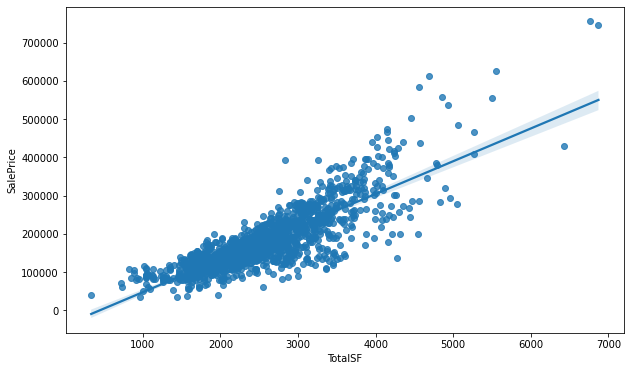

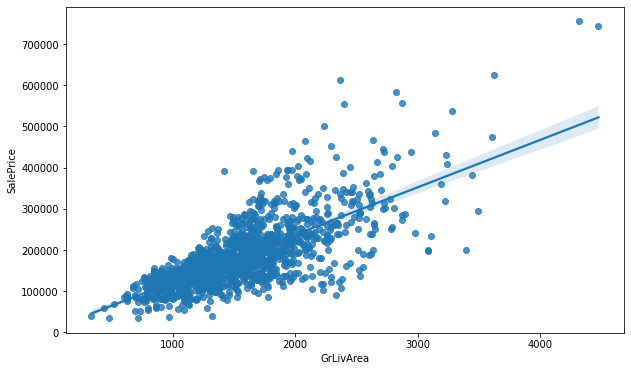

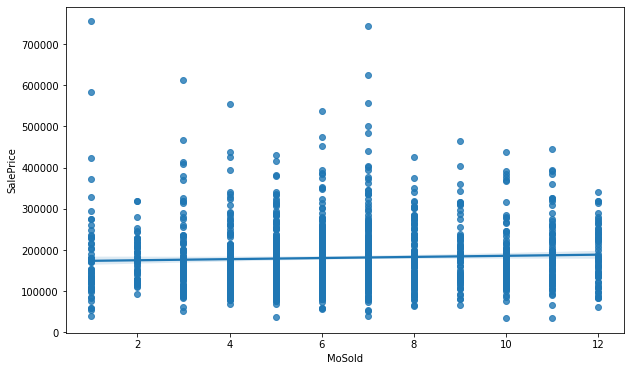

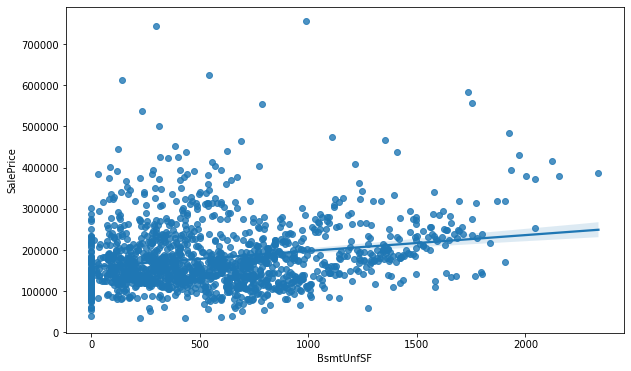

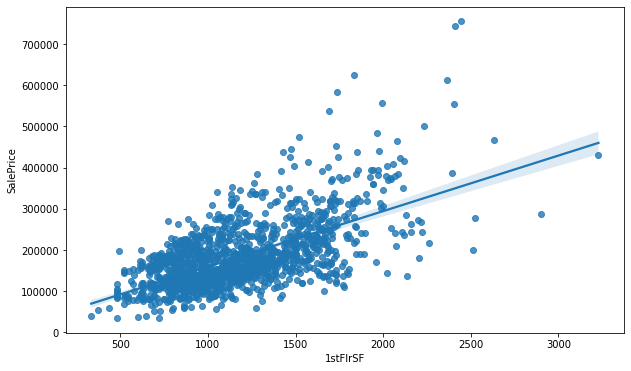

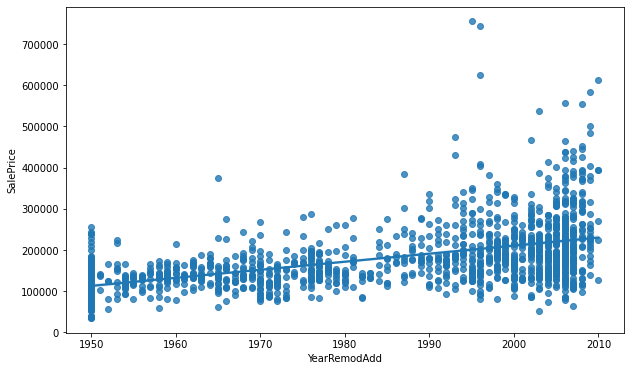

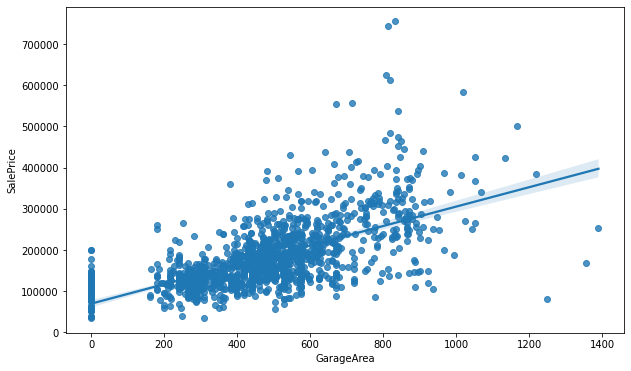

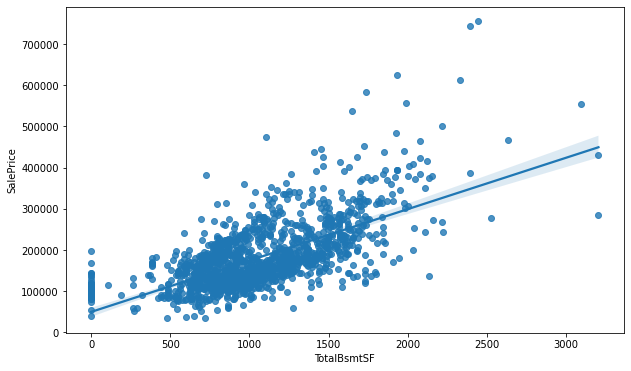

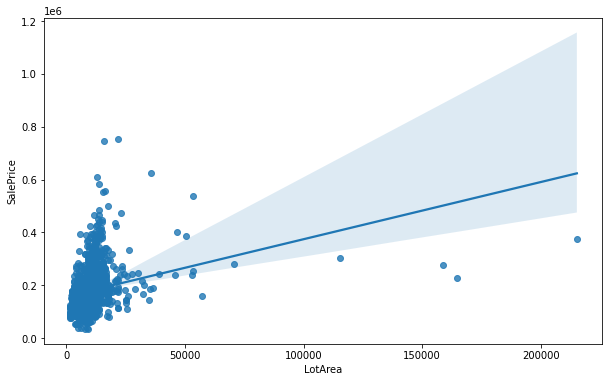

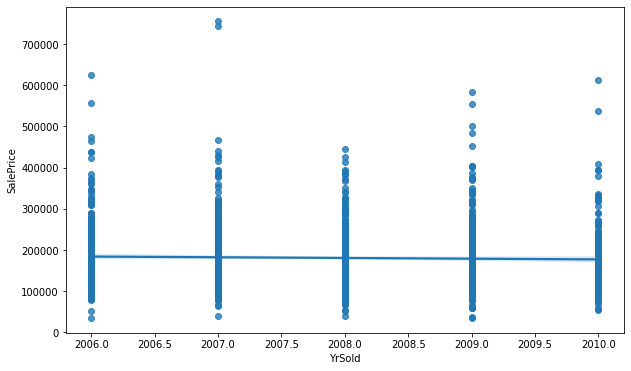

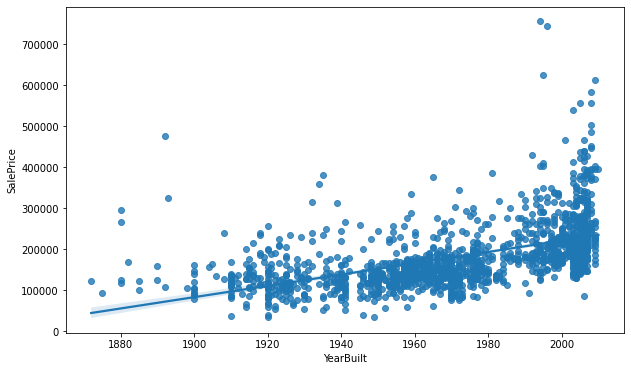

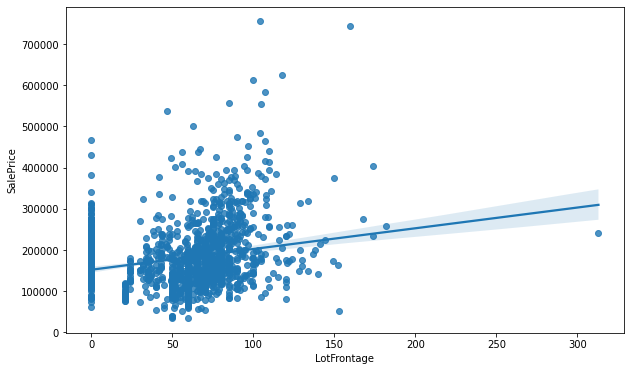

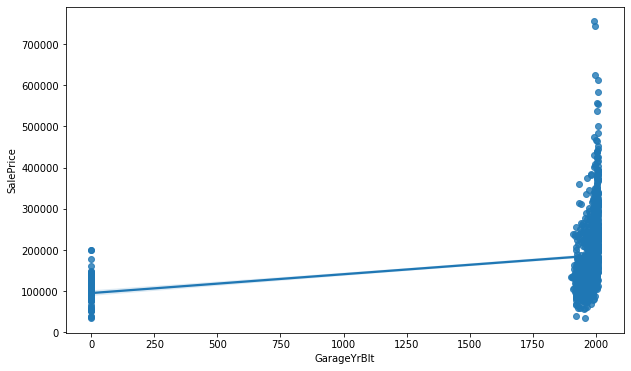

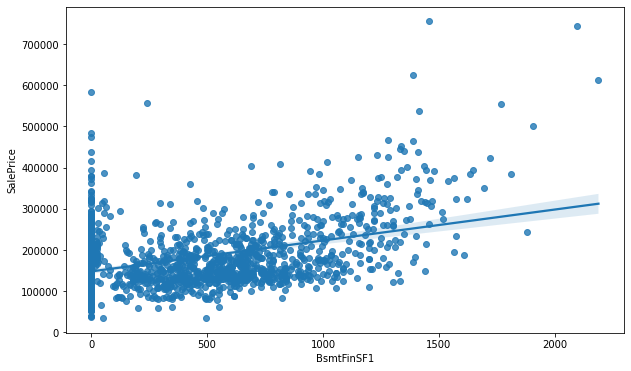

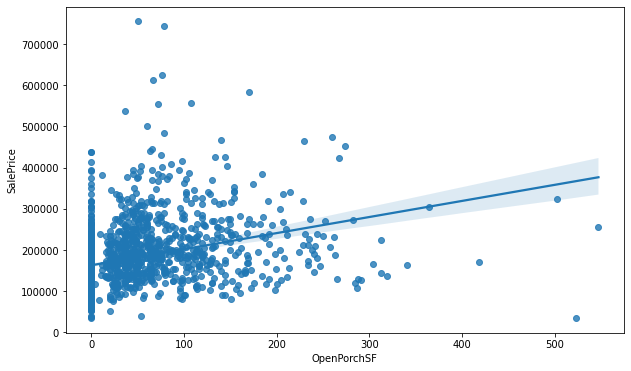

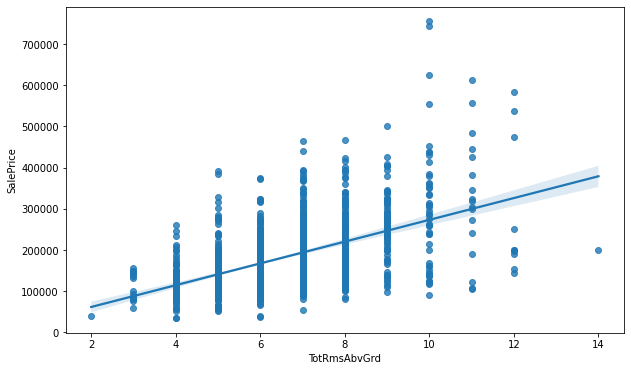

In [28]:
# Let see the data in graphics

for i in best_features.index:
    plt.figure(figsize=(10,6))
    sns.regplot(data = data_train,x=x[i],y = y)

In [29]:
# with thats imgs we can see the data behavior... It's not very "regular"

## Applying models

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

def models(x_train,x_test, y_train, y_test):
    
    list_score=[]
    
    # Random Forest
    rf_model = RandomForestRegressor(n_estimators=300, random_state=77).fit(x_train,y_train)
    rf_score = rf_model.score(x_test, y_test)
    list_score.append({"Random Forest":rf_score})
    one = pd.DataFrame({'Predict':rf_model.predict(x_test),'Real':y_test})
    plt.figure(figsize=(16,8))
    plt.title(f'O resultado da Random Forest é: {rf_score}', pad=15)
    sns.scatterplot(data=one)
    
    # DecisionTreeRegressor
    tree = DecisionTreeRegressor(random_state= 77).fit(x_train,y_train)
    tree_score = tree.score(x_test, y_test)
    list_score.append({'DecicionTree':tree_score})
    two = pd.DataFrame({'Predict':tree.predict(x_test),'Real':y_test})
    plt.figure(figsize=(16,8))
    plt.title(f'O resultado da Decision tree é: {tree_score}', pad=15)
    sns.scatterplot(data=two)
        
    # Linear Regression
    lm_model = LinearRegression().fit(x_train,y_train)
    lm_score = lm_model.score(x_test, y_test)
    list_score.append({'Linear Regression':lm_score})
    five = pd.DataFrame({'Predict':lm_model.predict(x_test),'Real':y_test})
    plt.figure(figsize=(16,8))
    plt.title(f'O resultado do LinearRegression é: {lm_score}', pad=15)
    sns.scatterplot(data=five)

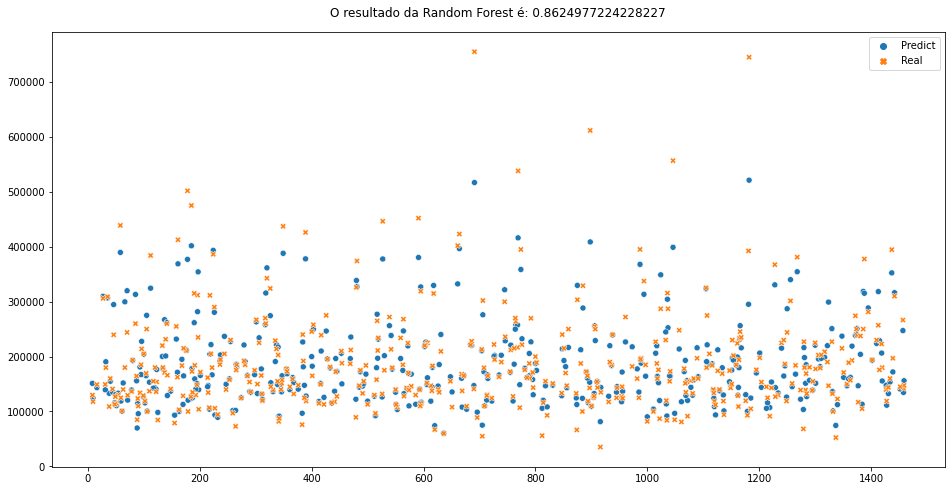

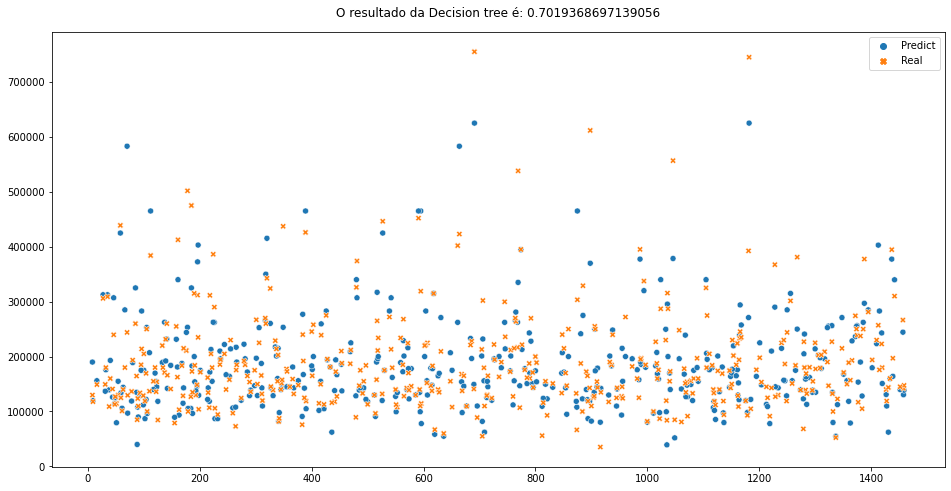

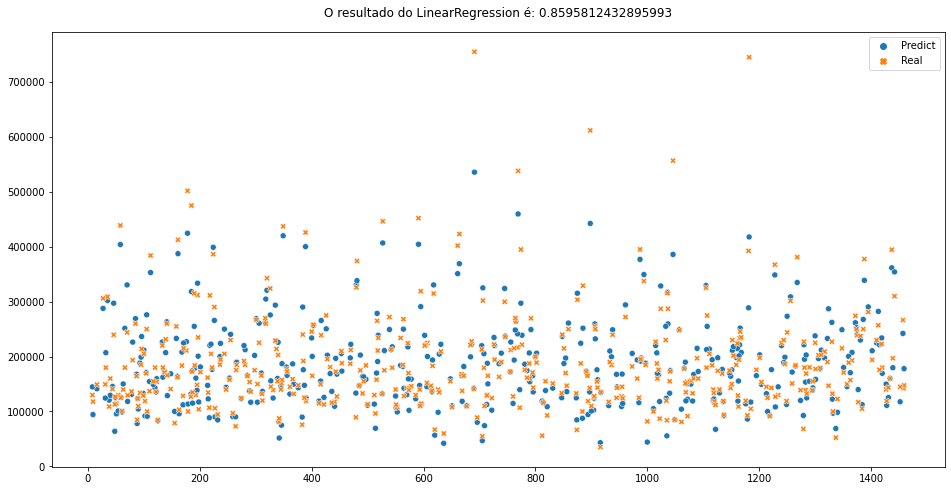

In [31]:
models(x_train, x_test, y_train, y_test)

In [32]:
rf_model = RandomForestRegressor(n_estimators=300, random_state=77)

In [33]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [34]:
import lightgbm as lgb

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

## Cross-validation

In [35]:
from sklearn.model_selection import KFold, cross_val_score

#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train.values)
    rmse= np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

score = rmsle_cv(rf_model)
score1 = rmsle_cv(model_xgb)
score2 = rmsle_cv(model_lgb)
print("\nRandom Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std())) # mean & the standard deviation
print("\nxgb score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nlgb score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[12:25:37] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:47] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:56] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting fl

## Making ensenble

In [36]:
rf_model.fit(x_train, y_train)
rf_predict = rf_model.predict(data_test)

model_xgb.fit(x_train, y_train)
xgb_pred = model_xgb.predict(data_test)

model_lgb.fit(x_train, y_train)
lgb_pred = model_lgb.predict(data_test)

[12:26:32] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


In [37]:
ensemble = rf_predict*0.70 + xgb_pred*0.15 + lgb_pred*0.15

## Data test results

In [38]:
rf_model.fit(x_train, y_train)

final_results = rf_model.predict(data_test)

In [39]:
results = pd.DataFrame({'Id':data_test_id,'SalePrice':final_results}).set_index('Id')
results.head()

,SalePrice
Id,
1461,122502.176667
1462,156787.016667
1463,173140.396667
1464,176791.290000
1465,187273.630000


In [40]:
results.to_csv('results_rf.csv')

In [41]:
sub = pd.DataFrame()
sub['Id'] = data_test_id
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)